<a href="https://colab.research.google.com/github/vivekshaoutlook/machine_learning/blob/master/03_SVM_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report


In [0]:
mnist = fetch_openml("mnist_784",version=1)

In [0]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [0]:
X=mnist["data"]
y=mnist["target"]

In [0]:
print(np.shape(X))
print(np.shape(y))

(70000, 784)
(70000,)


Since MNIST is an image dataset, each row represents the pixels of a single image. An image has a total of 28 by 28 = 784 pixels and that's why we have 784 columns. The dataset contains the 'flattend' image and to 'draw' an actual  image we need to 'reshape' this flattened image back to 28 by 28 pixels. Let's draw randomly an image from dataset

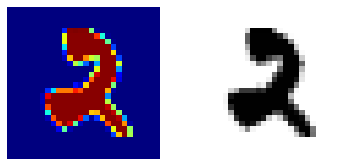

In [0]:
image = X[67328].reshape(28,28)
#plt.imshow(image,cmap="jet")
#plt.imshow(image,cmap="binary")
#plt.axis(False)
fig,axes = plt.subplots(nrows=1,ncols=2)
cmapVal = ["jet","binary"]
for ax,cv in zip(axes,cmapVal):
    ax.imshow(image,cmap=cv)
    ax.axis(False)





In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [0]:
#reducing size so for quick execution
X_train_reduced = X_train[:2000]
y_train_reduced = y_train[:2000]

**model1**.Let's do a quick (and dirty) SVC

In [0]:

svc_model = SVC()
svc_model.fit(X_train_reduced,y_train_reduced)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

model evaluation on the **training set** through confusion matrix and classification report.Instead of doing a simple prediction let's do the better cross_val_predict one. note that we are not touching test set yet.


In [0]:
#we are not doing the simple prediction...
#predictions_on_training_set = svc_model.predict(X_train_reduced)

#...instead let's do the cross_val_predict
predictions_on_training_set = cross_val_predict(svc_model,X_train_reduced,y_train_reduced,cv=4)

In [0]:
conf_matrix = confusion_matrix(y_train_reduced,predictions_on_training_set)
print (conf_matrix)

[[194   0   4   0   0   1   1   0   3   0]
 [  0 218   1   1   0   2   0   0   0   0]
 [  3   1 194   4   3   0   1   4   1   0]
 [  1   1   5 191   1   8   1   3   3   3]
 [  0   0   1   0 165   0   1   0   1   2]
 [  0   0   1   7   2 176   4   0   1   3]
 [  1   1   2   0   1   2 198   0   0   0]
 [  0   4   0   0   4   1   0 201   0   4]
 [  1   5   1   2   2   4   3   1 146   4]
 [  2   0   1   1   5   1   0   9   1 175]]


getting good result becasue most of the off-diagonal elements are very small numbers.however, let's also print the matrix graphically


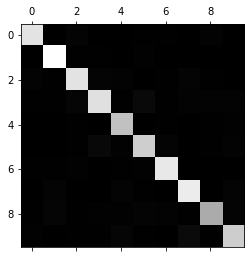

In [0]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
#plt.axis(False)

let's get the classification report as well

In [0]:
print(classification_report(y_train_reduced,predictions_on_training_set))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       203
           1       0.95      0.98      0.96       222
           2       0.92      0.92      0.92       211
           3       0.93      0.88      0.90       217
           4       0.90      0.97      0.93       170
           5       0.90      0.91      0.90       194
           6       0.95      0.97      0.96       205
           7       0.92      0.94      0.93       214
           8       0.94      0.86      0.90       169
           9       0.92      0.90      0.91       195

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



F1 score is above 90 for all digits which is really good.The recall for digit '3' is 0.88 and for digit '8' is 0.86.For these digits,  model had some difficulty in classifying them rightly as '3' or '8'

next now:
1.doing using GridSearchCV
2.running over entire X_train,y_train
3.final model evaluation of GridsearchCV model using X_train,y_train and X_test,y_test